In [2]:
import pandas as pd

In [3]:
df_soil=pd.read_csv(r"C:\Users\Vanshika\Desktop\vanshika\arkashine\dataset\augmented_soil (1).csv")
df_target=pd.read_csv(r"C:\Users\Vanshika\Desktop\vanshika\arkashine\dataset\augmented_soil_target.csv")

In [4]:
df_soil.head()

,A(410),B(435),C(460),D(485),E(510),F(535),G(560),H(585),R(610),I(645),S(680),J(705),U(760),V(810),W(860),K(900),L(940),T(730)
0,1945.57,992.41,2051.13,707.77,822.51,1371.58,318.71,315.85,1305.33,159.24,329.50,49.90,75.75,237.65,305.23,60.10,36.52,83.32
1,2336.77,816.05,2008.33,693.91,848.56,1691.27,373.00,375.11,1339.28,188.68,308.97,62.27,69.30,242.82,277.02,82.78,44.74,77.27
2,1625.50,1070.13,2472.09,810.33,960.65,1745.17,428.89,436.37,1206.99,226.15,292.57,63.53,68.50,211.82,273.69,88.45,47.47,75.75
3,2557.95,1594.40,2790.56,1008.17,1128.00,1570.73,488.55,499.64,1339.11,261.84,357.22,77.09,77.36,229.90,315.37,98.09,54.78,84.07
4,3262.28,1300.30,2948.80,949.85,1114.58,2049.14,501.99,513.20,1482.11,268.53,338.74,77.09,75.75,260.90,307.48,108.30,55.69,86.69


In [5]:
df_target.head()

,pH,EC (dS/m),OC (%),P (kg/ha),K (kg/ha),Ca (meq/100g),Mg (meq/100g),S (ppm),Fe (ppm),Mn (ppm),Cu (ppm),Zn (ppm),B (ppm)
0,6.72,0.09,1.05,26.10,444.00,6.14,2.32,11.21,3.08,14.10,2.23,0.84,1.22
1,6.04,0.17,0.33,81.99,372.00,5.98,0.50,12.93,47.74,37.63,3.28,6.79,1.13
2,5.35,0.07,0.87,80.59,132.00,3.15,2.49,5.17,14.96,44.53,1.22,1.21,0.98
3,6.38,0.03,0.48,33.81,221.76,3.40,1.90,11.59,6.38,10.62,1.77,0.99,0.27
4,8.58,0.04,0.69,38.19,234.08,6.60,5.20,34.10,14.08,3.56,1.56,0.40,0.77


In [6]:
print(df_soil.shape)
print(df_target.shape)

(1000, 18)
(1000, 13)


In [7]:
print(df_soil.isna().sum())
print(df_target.isna().sum())

A(410)    0
B(435)    0
C(460)    0
D(485)    0
E(510)    0
F(535)    0
G(560)    0
H(585)    0
R(610)    0
I(645)    0
S(680)    0
J(705)    0
U(760)    0
V(810)    0
W(860)    0
K(900)    0
L(940)    0
T(730)    0
dtype: int64
pH               50
EC  (dS/m)       50
OC (%)           50
P   (kg/ha)      50
K (kg/ha)        50
Ca (meq/100g)    78
Mg (meq/100g)    50
S (ppm)          50
Fe (ppm)         50
Mn (ppm)         50
Cu (ppm)         50
Zn (ppm)         50
B (ppm)          50
dtype: int64


In [8]:
df_soil=df_soil.fillna(df_soil.mean())
df_target=df_target.fillna(df_target.mean())
print(df_soil.isna().sum())
print(df_target.isna().sum())

A(410)    0
B(435)    0
C(460)    0
D(485)    0
E(510)    0
F(535)    0
G(560)    0
H(585)    0
R(610)    0
I(645)    0
S(680)    0
J(705)    0
U(760)    0
V(810)    0
W(860)    0
K(900)    0
L(940)    0
T(730)    0
dtype: int64
pH               0
EC  (dS/m)       0
OC (%)           0
P   (kg/ha)      0
K (kg/ha)        0
Ca (meq/100g)    0
Mg (meq/100g)    0
S (ppm)          0
Fe (ppm)         0
Mn (ppm)         0
Cu (ppm)         0
Zn (ppm)         0
B (ppm)          0
dtype: int64


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison(x):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # ✅ Fixed: plt.subplots (not subplot)
    
    # Histogram
    axes[0].set_title("Histogram")
    sns.histplot(x, ax=axes[0])
    axes[0].set_xlabel("Checking outliers")
    
    # Boxplot
    axes[1].set_title("Boxplot")
    sns.boxplot(x=x, ax=axes[1])  # ✅ Added x= for clarity

    plt.tight_layout()
    plt.show()


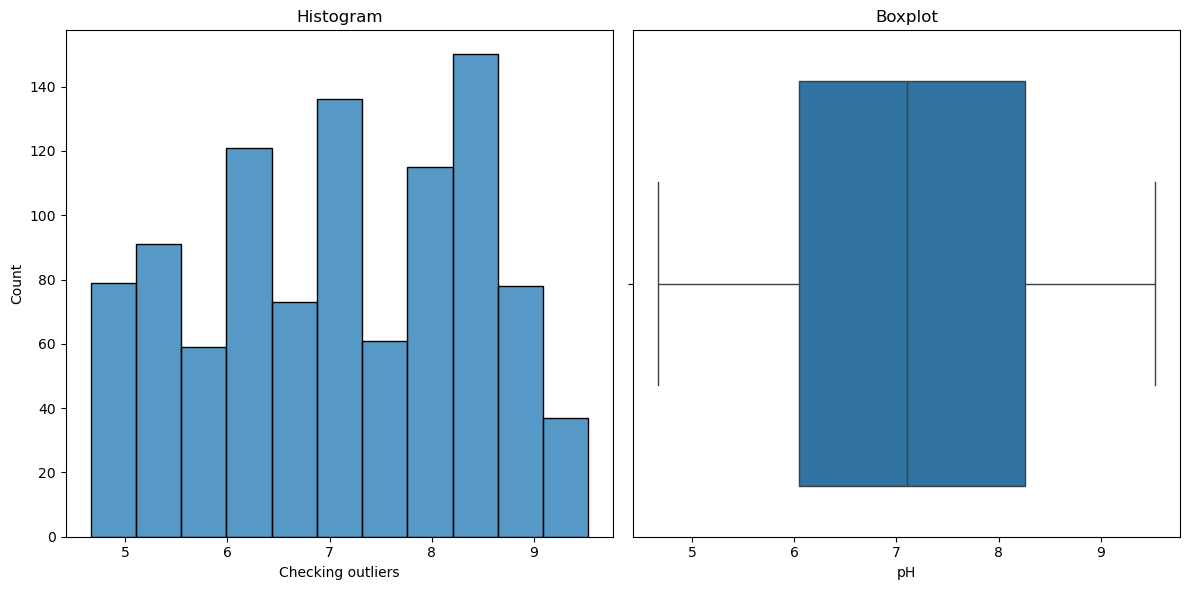

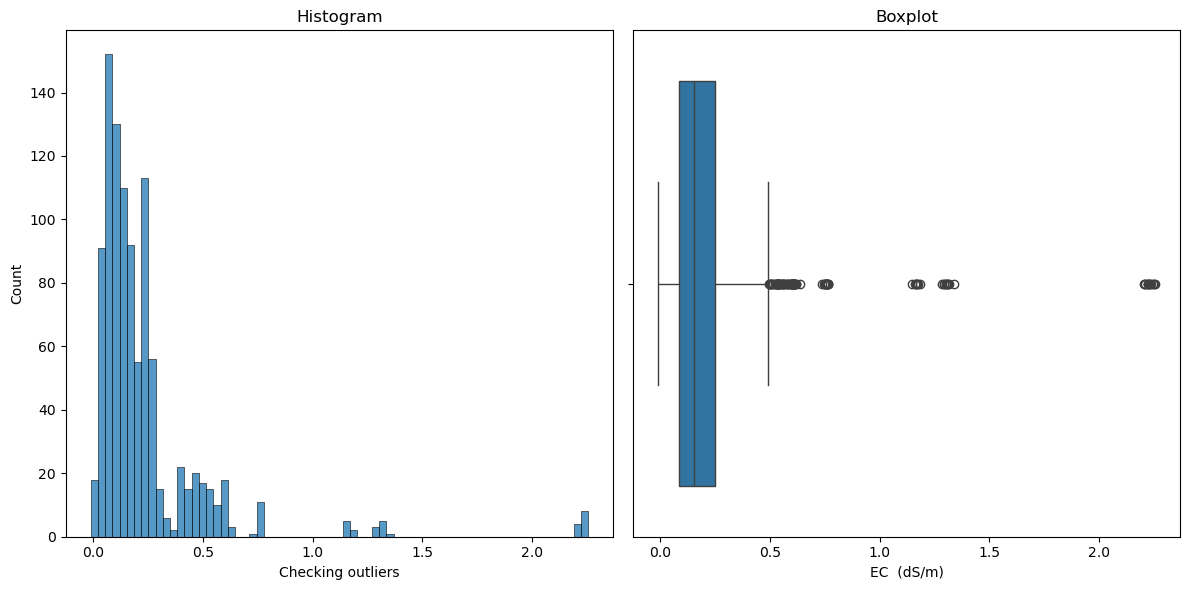

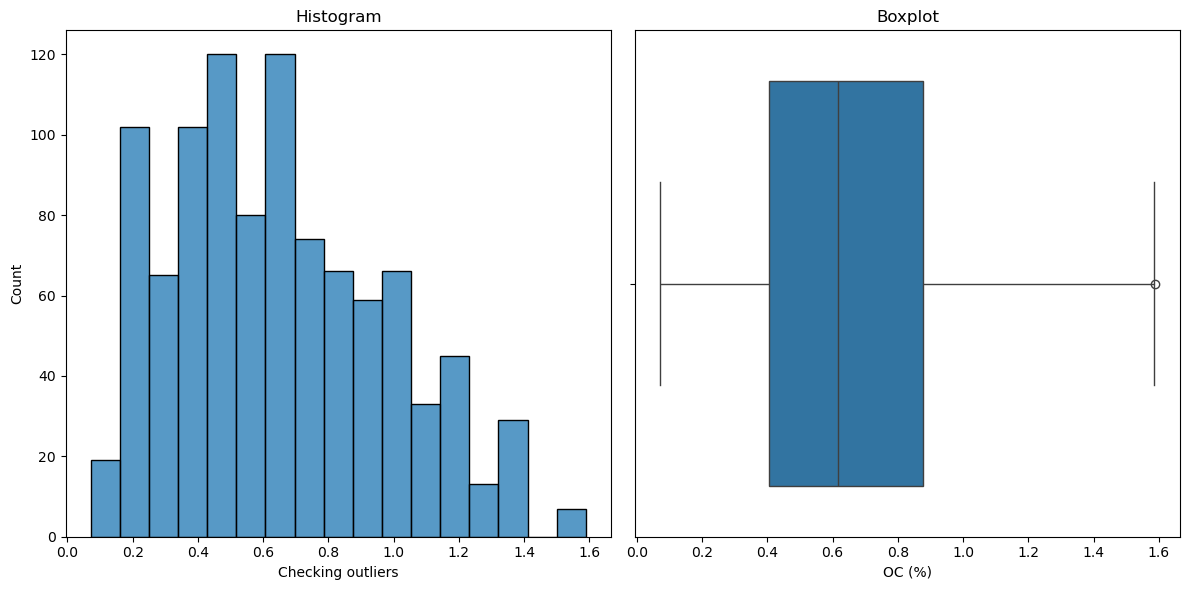

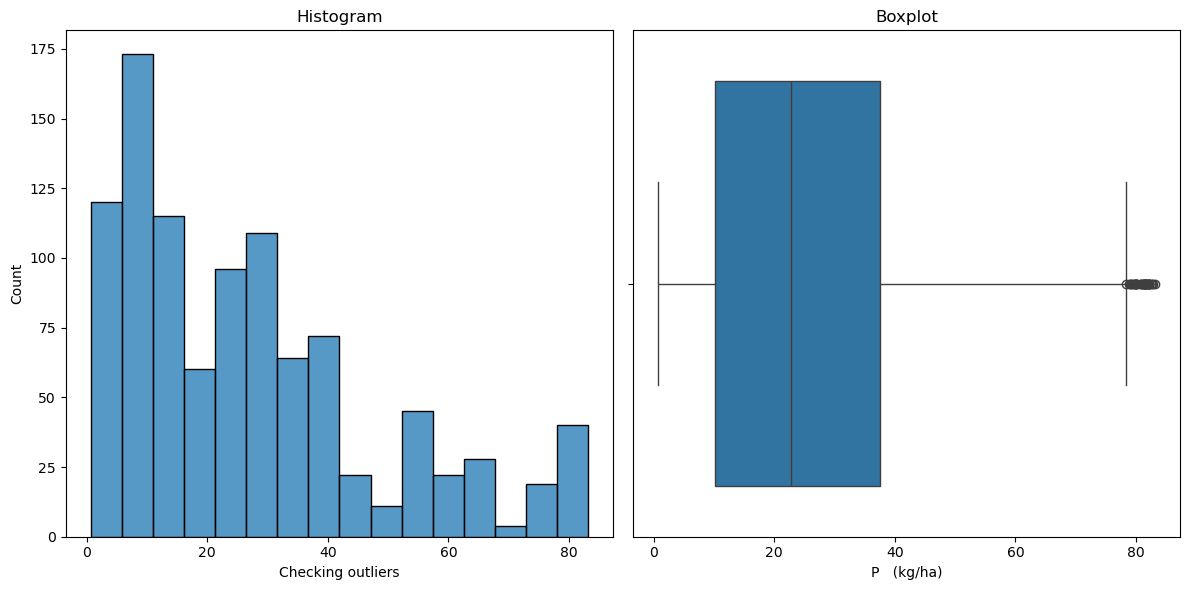

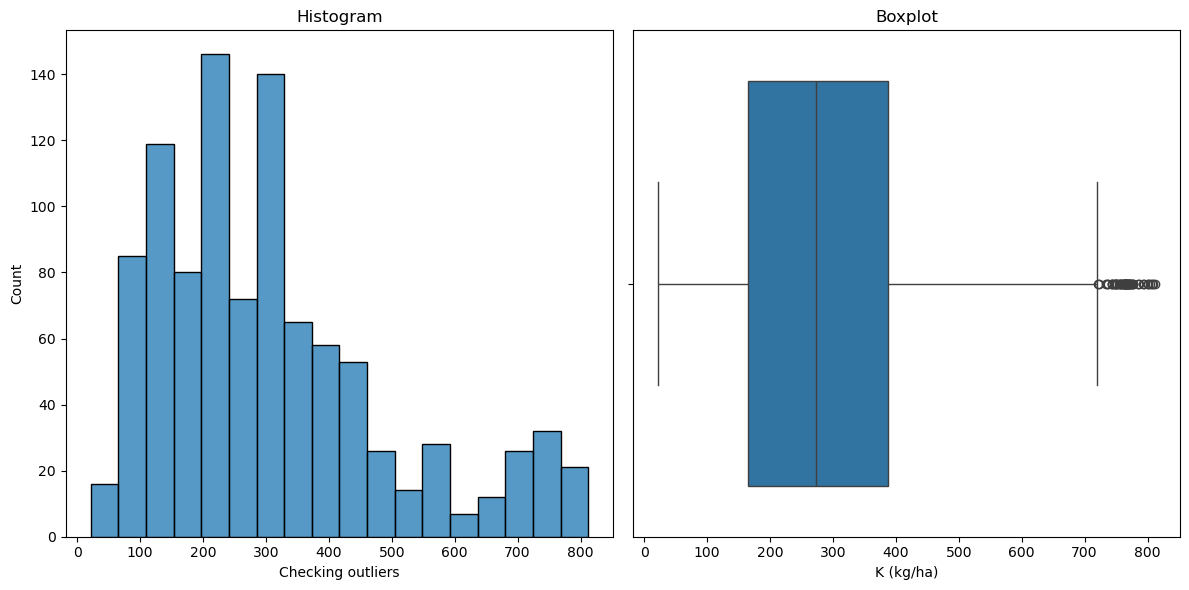

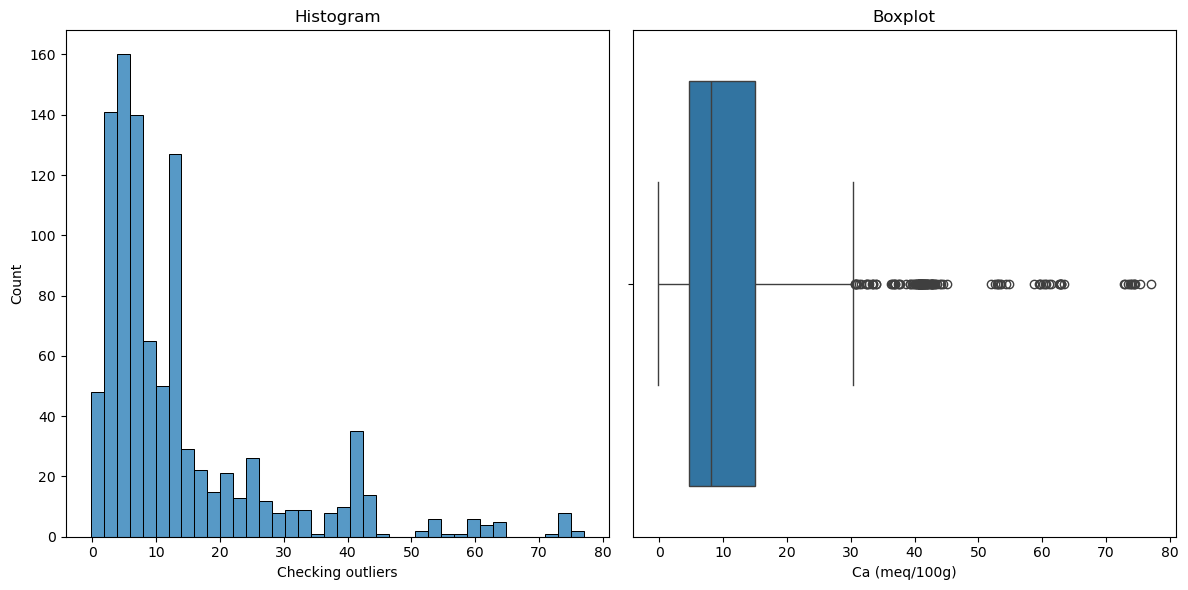

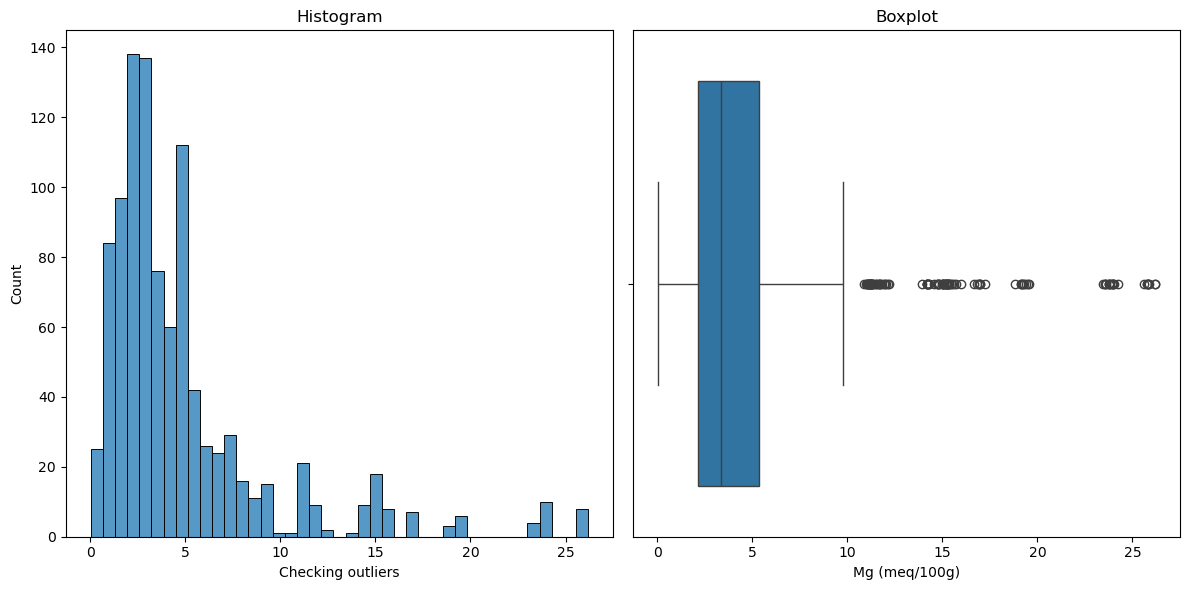

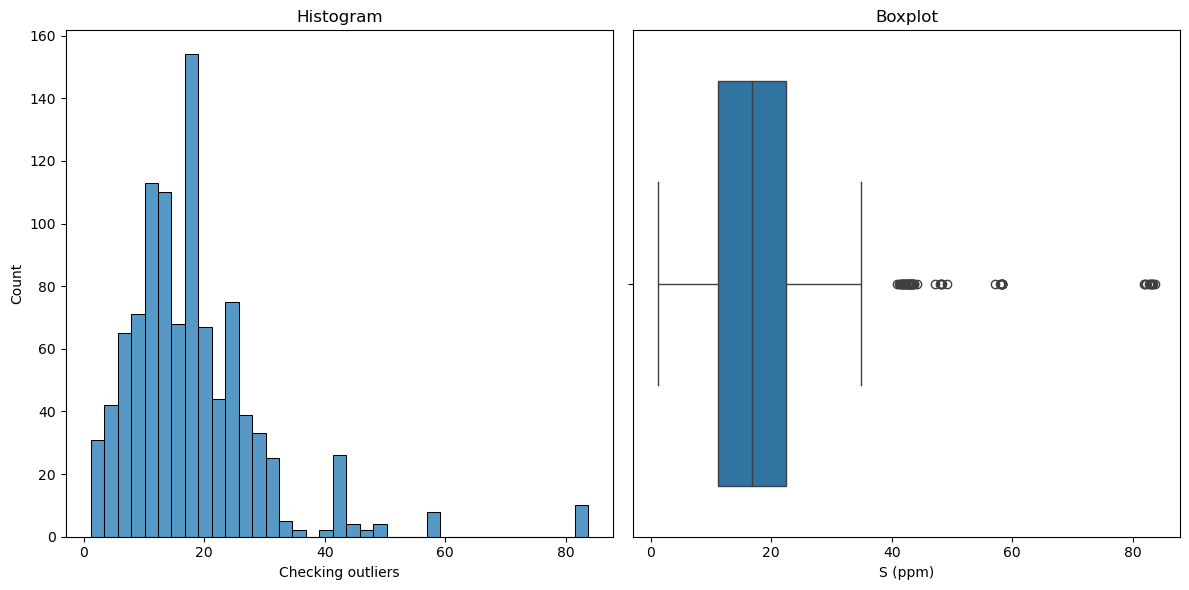

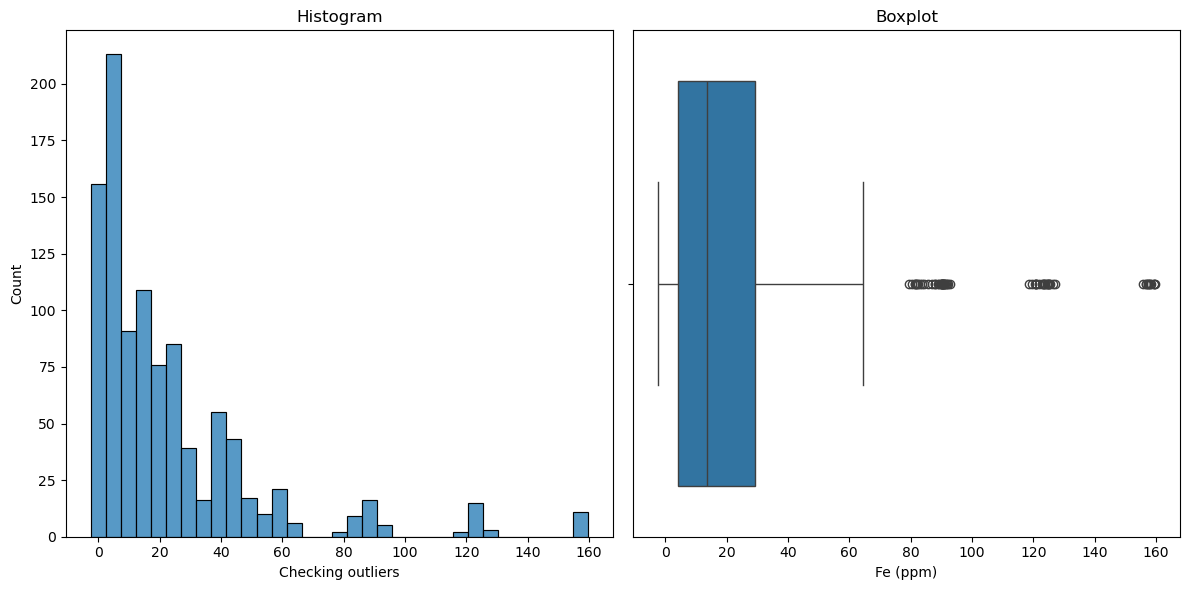

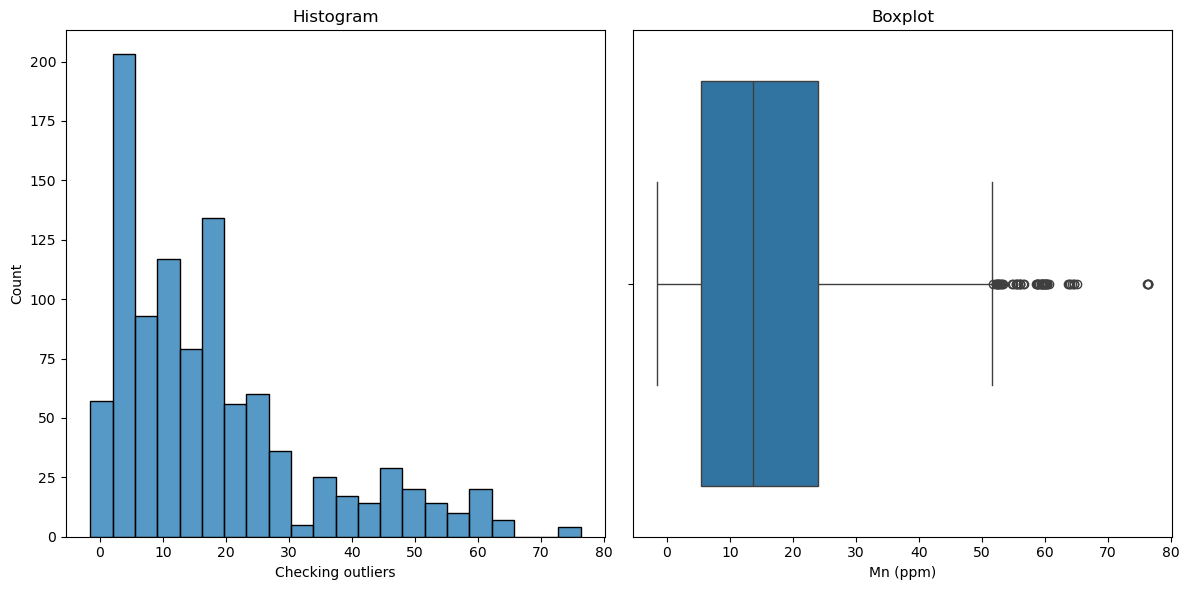

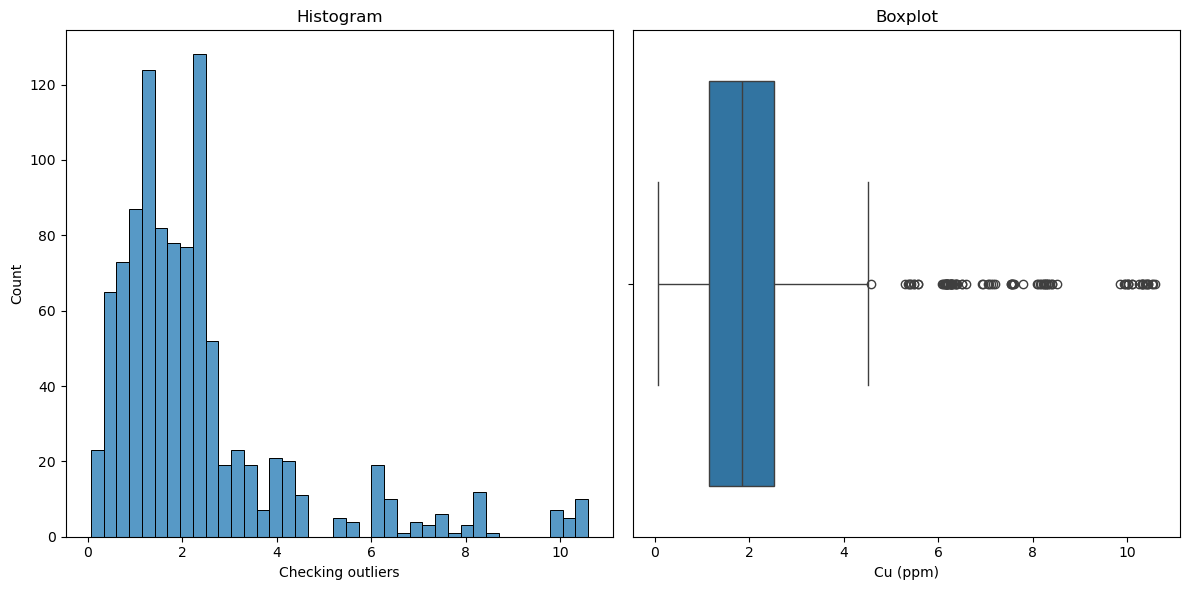

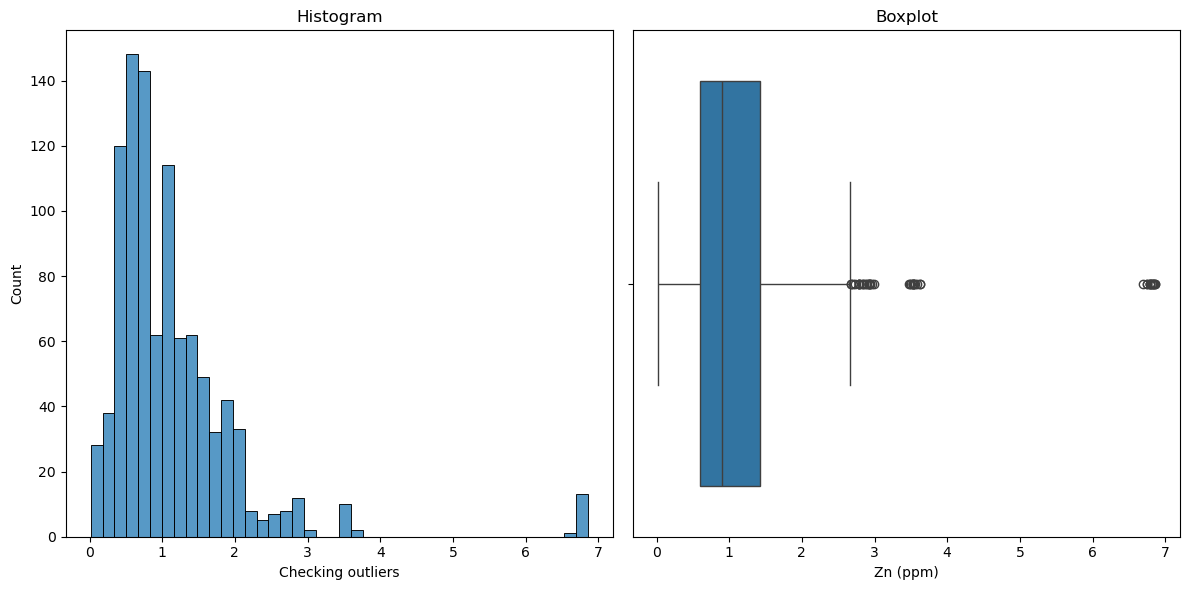

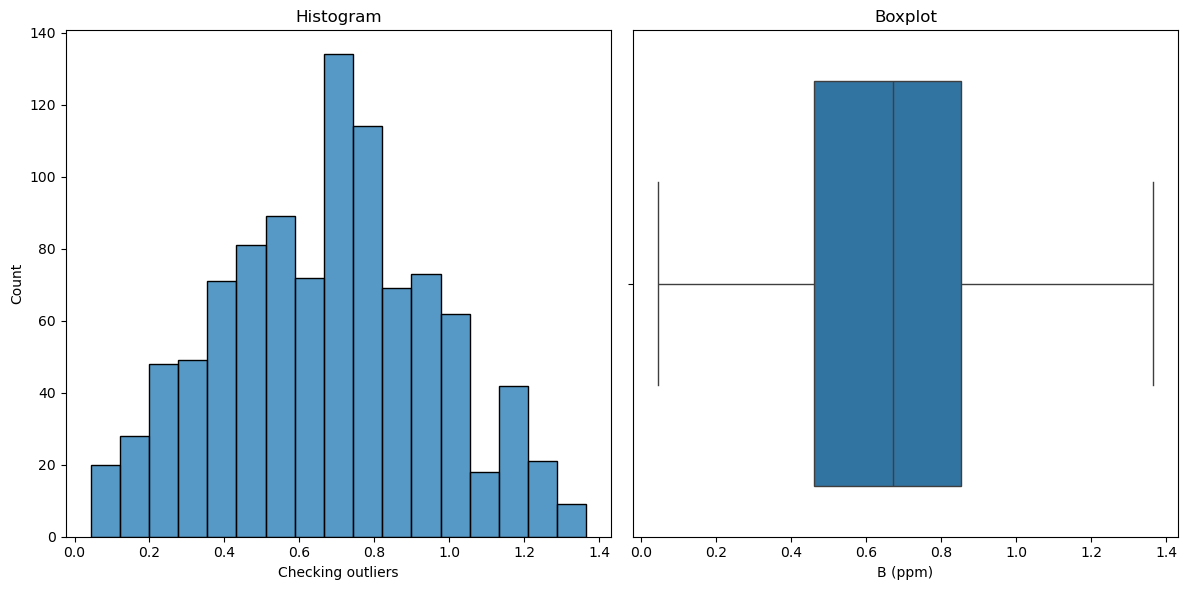

In [11]:
for col in df_target.columns:
    plot_comparison(df_target[col])
    plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
sc=StandardScaler()
x_scaled=sc.fit_transform(df_soil)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, df_target, test_size=0.2, random_state=42)

In [17]:
# Model training with hyperparameter tuning for KNeighborsRegressor
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
knn_grid_search.fit(X_train, y_train)

best_knn_model = knn_grid_search.best_estimator_


KNeighborsRegressor Feature Importance:
   Feature  Importance
0   A(410)    0.062786
1   B(435)    0.062786
16  L(940)    0.062786
15  K(900)    0.062786
14  W(860)    0.062786
13  V(810)    0.062786
12  U(760)    0.062786
11  J(705)    0.062786
10  S(680)    0.062786
9   I(645)    0.062786
8   R(610)    0.062786
7   H(585)    0.062786
6   G(560)    0.062786
5   F(535)    0.062786
4   E(510)    0.062786
3   D(485)    0.062786
2   C(460)    0.062786
17  T(730)    0.062786


c:\Users\Vanshika\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\Vanshika\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Vanshika\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Vanshika\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Vanshika\anaconda3\Lib\subprocess.py", line 1026, in __init__


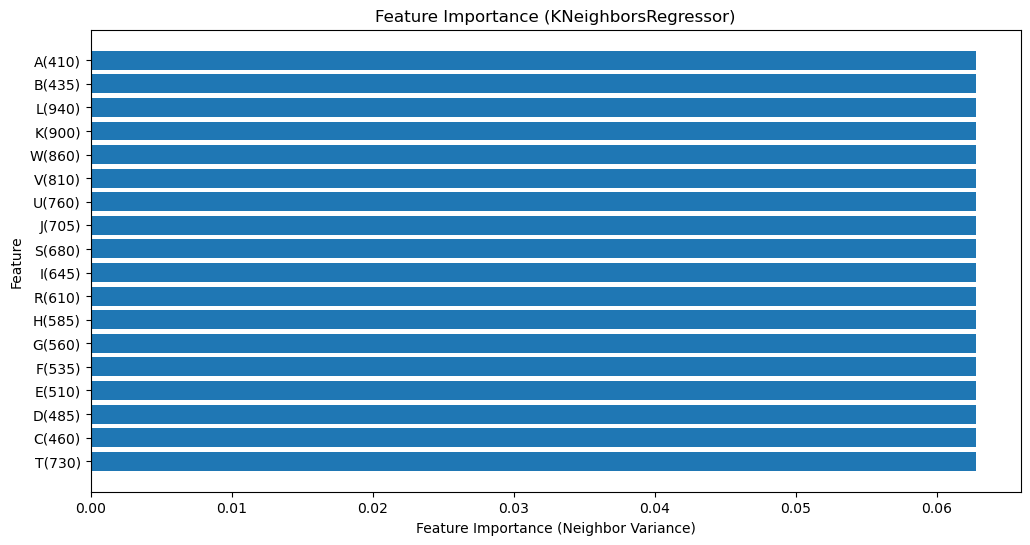

In [18]:
def feature_importance_analysis_knn(model, X):
    # Compute the variance of each feature across neighbors for each sample
    neighbor_variances = np.var(model.kneighbors(X)[0], axis=1).mean(axis=0)

    # Create DataFrame
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': neighbor_variances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display importance values
    print(importance_df)

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
    plt.xlabel('Feature Importance (Neighbor Variance)')
    plt.ylabel('Feature')
    plt.title('Feature Importance (KNeighborsRegressor)')
    plt.gca().invert_yaxis()
    plt.show()

# Apply feature importance analysis for KNeighborsRegressor
print("\nKNeighborsRegressor Feature Importance:")
feature_importance_analysis_knn(best_knn_model, df_soil)

In [19]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training predictions
    y_train_pred = model.predict(X_train)
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse=np.sqrt(train_mse)
    
    # Print the metrics
    print(f"Mean Squared Error (MSE): {train_mse}")
    print(f"R-squared (R2) Score: {train_r2}")
    print(f"Mean Absolute Error (MAE): {train_mae}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse}")

print("\nKNN Model Evaluation:")
evaluate_model(best_knn_model, X_train, X_test, y_train, y_test)



KNN Model Evaluation:
Mean Squared Error (MSE): 2261.417676627364
R-squared (R2) Score: 0.14631009863012276
Mean Absolute Error (MAE): 15.278373335430201
Root Mean Squared Error (RMSE): 47.55436548443648


In [20]:
target_columns = df_target.columns.to_list()

{'pH': 7.24646274394191, 'EC  (dS/m)': 0.23217674313699027, 'OC (%)': 0.6427664031749514, 'P   (kg/ha)': 34.35159198552584, 'K (kg/ha)': 397.75551441151754, 'Ca (meq/100g)': 18.7637657561013, 'Mg (meq/100g)': 4.393326143237509, 'S (ppm)': 14.721704803349732, 'Fe (ppm)': 15.063908562530214, 'Mn (ppm)': 12.660729939966172, 'Cu (ppm)': 1.8969999432515625, 'Zn (ppm)': 1.1948020004247943, 'B (ppm)': 0.6667372014393527}


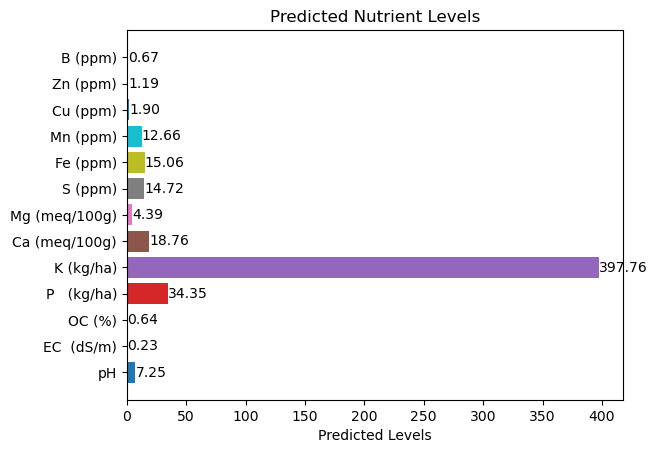

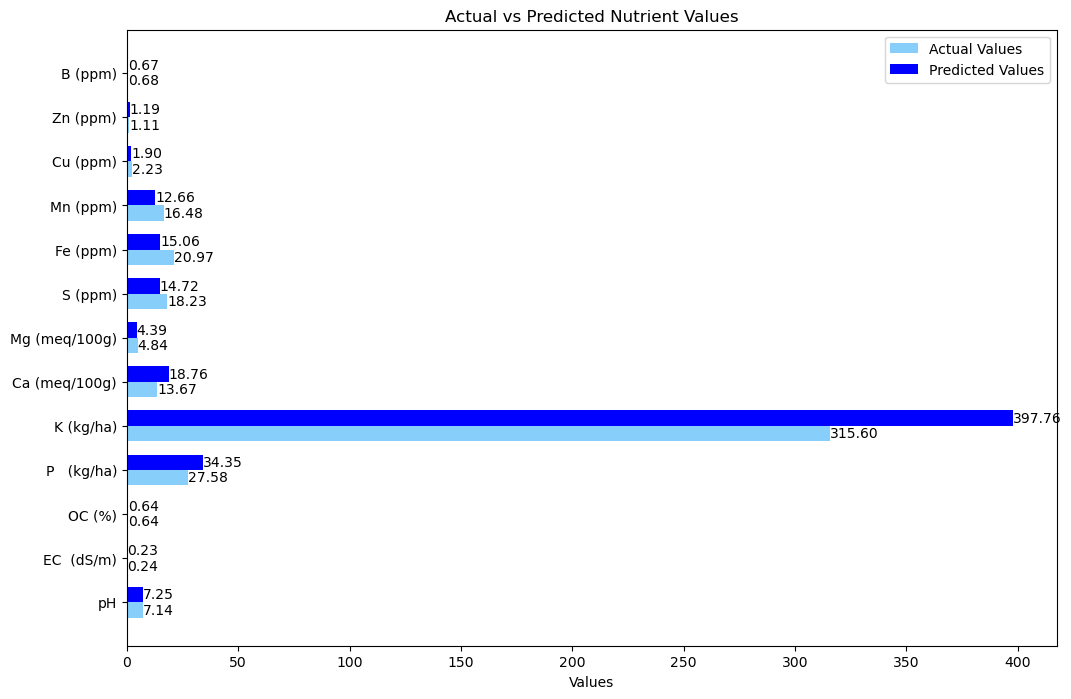

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data
data = {
    'A(410)': [1947.48],
    'B(435)': [992.41],
    'C(460)': [2051.13],
    'D(485)': [707.77],
    'E(510)': [822.51],
    'F(535)': [1371.58],
    'G(560)': [318.85],
    'H(585)': [315.68],
    'R(610)': [1305.33],
    'I(645)': [159.24],
    'S(680)': [329.5],
    'J(705)': [49.9],
    'U(760)': [75.75],
    'V(810)': [237.65],
    'W(860)': [305.23],
    'K(900)': [60.1],
    'L(940)': [36.52],
    'T(730)': [83.32]
}

# Convert input data to DataFrame
def preprocess_input_data(input_data):
    input_df = pd.DataFrame(input_data)
    return input_df

df2 = preprocess_input_data(data)
scaled_input = sc.transform(df2)
prediction = best_knn_model.predict(scaled_input)

# Predicted Nutrient Levels
predicted_values = {}
for i, col in enumerate(target_columns):
    predicted_values[col] = prediction[0][i]

print(predicted_values)

# Plotting bar graph to represent the predicted nutrient levels
colors = list(mcolors.TABLEAU_COLORS.values())
fig, ax = plt.subplots()
bars = ax.barh(list(predicted_values.keys()), list(predicted_values.values()), color=colors[:len(predicted_values)])
ax.set_xlabel('Predicted Levels')
ax.set_title('Predicted Nutrient Levels')

# Adding color to each bar and displaying the value
for bar, value in zip(bars, predicted_values.values()):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()

# Plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))


# Plot actual values
actual_bars = plt.barh(indices - bar_width / 2, y_test.mean(), bar_width, label='Actual Values', color='lightskyblue')

# Plot predicted values
predicted_bars = plt.barh(indices + bar_width / 2, [predicted_values[col] for col in target_columns], bar_width, label='Predicted Values', color='blue')

# Adding nutrient labels
plt.yticks(indices, target_columns)

# Adding labels and title
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()

In [22]:
import joblib

In [23]:
joblib.dump(best_knn_model, 'best_knn_model.pkl')
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [24]:
target_columns

['pH',
 'EC  (dS/m)',
 'OC (%)',
 'P   (kg/ha)',
 'K (kg/ha)',
 'Ca (meq/100g)',
 'Mg (meq/100g)',
 'S (ppm)',
 'Fe (ppm)',
 'Mn (ppm)',
 'Cu (ppm)',
 'Zn (ppm)',
 'B (ppm)']

In [25]:
feature_names=df_soil.columns.tolist()

In [26]:
feature_names

['A(410)',
 'B(435)',
 'C(460)',
 'D(485)',
 'E(510)',
 'F(535)',
 'G(560)',
 'H(585)',
 'R(610)',
 'I(645)',
 'S(680)',
 'J(705)',
 'U(760)',
 'V(810)',
 'W(860)',
 'K(900)',
 'L(940)',
 'T(730)']

In [27]:

joblib.dump(target_columns,"target_columns.pkl")

['target_columns.pkl']

In [28]:
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']